In [ ]:
import pandas as pd 
import numpy as np
df = pd.read_csv(rf'G:\yansi0619\Spectrum_analyse\SpectralExtraction\烟丝梯度反射光谱数据_split.csv' , index_col = 0)
# df = df.groupby(df.index).mean()

labels = df.index.values
spectrum = df.values
spectrum = spectrum[:,50:450]
wave = [float(i) for i in df.columns.values]
wave = wave[50:450]

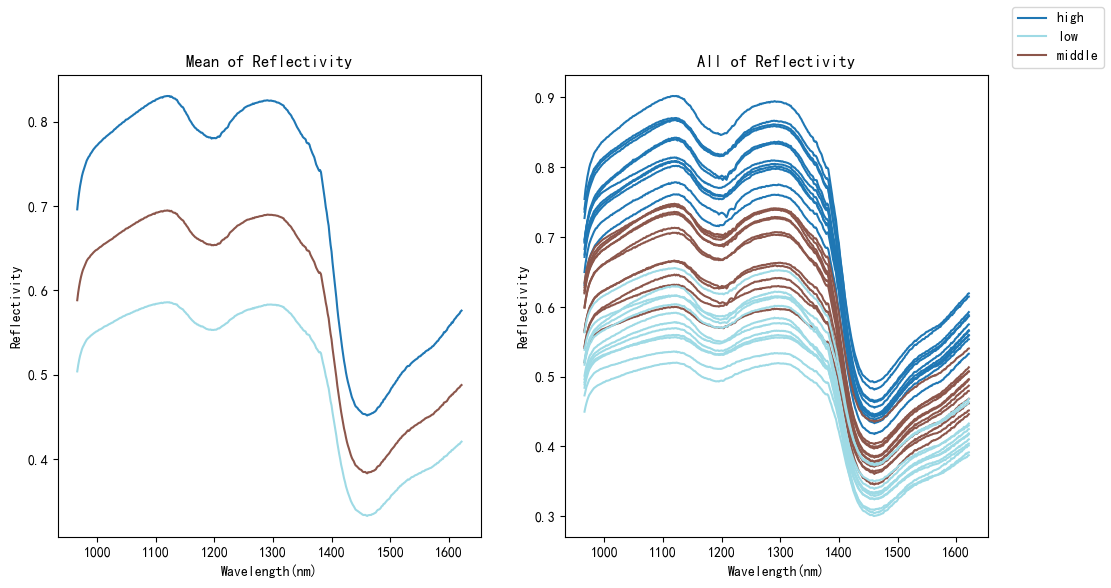

In [2]:
import importlib
import SpectrumAnalyse  # 导入模块
importlib.reload(SpectrumAnalyse)
# 导入需要的函数
from SpectrumAnalyse import plot_duplicate_data_both, split_data
import matplotlib.pyplot as plt

category,  split_datas = split_data(labels , spectrum)
plot_duplicate_data_both(category,  split_datas , wave  , save=True) 

In [3]:
from SpectrumAnalyse import calculate_spectral_distances

In [4]:
df_high = df

labels = df_high.index.values

spectrum = df_high.values

# Randomly select 12 indices from the spectrum (rows, i.e., samples)
random_indices = np.random.choice(spectrum.shape[0], size=12, replace=False)
# Use the selected indices to get the corresponding rows from spectrum
random_spectrum = spectrum[random_indices]



spectrum = random_spectrum[:,50:450]
wave = [float(i) for i in df_high.columns.values]
wave = wave[50:450]

result = calculate_spectral_distances(spectrum)
print(f"平均光谱角 (SAM): {result['average_sam_degrees']:.2f} 度")
print(f"平均欧氏距离 (ED): {result['average_euclidean_distance']:.4f}")
print(f"平均光谱信息散度 (SID): {result['average_spectral_divergence']:.4f}")

平均光谱角 (SAM): 1.37 度
平均欧氏距离 (ED): 2.2144
平均光谱信息散度 (SID): 0.0010


In [5]:
import pandas as pd

# Assuming `category` and `split_datas` are defined
results = []  # List to store results for each category

# Loop through each category and its corresponding data in split_datas
for category_name, data in zip(category, split_datas):
    # Calculate the spectral distances for each category
    result = calculate_spectral_distances(data)
    
    # Append the results to the list
    results.append({
        'Category': category_name,
        'Average SAM (degrees)': f"{result['average_sam_degrees']:.2f} " ,
        'Average Euclidean Distance': f"{result['average_euclidean_distance']:.4f}",
        'Average Spectral Divergence (SID)': f"{result['average_spectral_divergence']:.4f}"
    })

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
results_df

,Category,Average SAM (degrees),Average Euclidean Distance,Average Spectral Divergence (SID)
0,high,0.71,0.8501,0.0003
1,middle,1.09,0.9818,0.0006
2,low,1.51,0.8177,0.0013
